In [1]:
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [2]:
#Reading input data for training and testing

# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\March\\14.05.2023-DistanceVariationExternal"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, sep = '\t', engine = 'python', header = None)
        empty  = empty.append(df1)
    else :
        continue  
        
# Empty seat Data ingest and attach Label = 0
empty.reset_index(inplace = True)

empty.drop(empty.iloc[:,0:11] ,axis=1,inplace=True)
empty.head()

Adding the following files : 
adc_chairtowel_distance0.34_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_chairtowel_distance0.37_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_chairtowel_distance0.40_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_chairtowel_distance0.43_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_chairtowel_distance0.46_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_chairtowel_distance0.49_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\470299476.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,10,11,12,13,14,15,16,17,18,19,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,0.34,0,0,V0.2,0,0,0,-16,-4,84,...,2,6,-1,-15,-26,-29,-32,-11,26,28
1,0.34,0,0,V0.2,0,0,-1,-11,-17,-12,...,-8,19,31,33,110,53,19,12,13,10
2,0.34,0,0,V0.2,0,0,-30,-32,-23,-9,...,-12,-12,-11,-15,-17,-7,-2,-9,-38,-50
3,0.34,0,0,V0.2,0,0,-27,-9,-2,-2,...,-7,5,3,-8,-7,-4,-7,-9,-1,5
4,0.34,0,0,V0.2,0,0,-1,-8,-9,-152,...,-3,-13,-14,0,3,-4,4,11,3,-8


In [3]:
#The first column is the distance column, 0.34 m , 0.37 m and so on till 0.49 m

empty.drop(empty.iloc[:,1:6] ,axis=1,inplace=True)
empty.iloc[195:205,:]

,10,16,17,18,19,20,21,22,23,24,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
195,0.34,19,18,71,98,124,140,158,183,202,...,-38,-44,-48,-50,-50,-49,-44,-44,-39,-34
196,0.34,-34,-37,-37,-23,19,57,97,135,154,...,-3,3,-7,-10,-4,-2,-12,-11,4,10
197,0.34,-3,-4,0,19,68,108,129,148,159,...,-3,-4,-10,-28,-20,-12,-9,-7,27,4
198,0.34,-4,-8,-11,-10,-97,-77,-47,-4,45,...,1,-1,-11,-14,-6,0,-4,-1,5,2
199,0.34,-9,-6,-4,119,137,166,190,202,208,...,-18,-13,-4,-5,-12,-10,-9,-14,-13,-2
200,0.37,-22,-29,-37,-35,-167,-178,-132,-93,-52,...,-37,-9,1,7,62,51,-1,-6,-10,-14
201,0.37,-39,-32,-21,-21,-29,-19,28,41,55,...,-39,-32,-37,-33,-20,-24,-38,-46,-39,-36
202,0.37,-8,-6,-17,-8,19,-146,-168,-197,-228,...,-8,1,4,-9,-16,-8,0,-7,-9,3
203,0.37,5,-7,-10,-3,1,-225,-206,-206,-203,...,2,2,-17,-12,9,14,-10,-19,-10,-12
204,0.37,-21,-14,3,1,-196,-174,-165,-172,-144,...,-16,-23,-6,17,13,-14,-24,-18,-18,-13


In [4]:
total = pd.DataFrame()
total = total.append(empty.iloc[:,1:])
total

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15496\1650781655.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(empty.iloc[:,1:])


,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,0,-16,-4,84,50,9,-34,-73,-104,-125,...,2,6,-1,-15,-26,-29,-32,-11,26,28
1,-1,-11,-17,-12,-4,4,-239,-205,-171,-142,...,-8,19,31,33,110,53,19,12,13,10
2,-30,-32,-23,-9,-26,-79,-112,-133,-160,-178,...,-12,-12,-11,-15,-17,-7,-2,-9,-38,-50
3,-27,-9,-2,-2,-47,-85,-109,-131,-154,-179,...,-7,5,3,-8,-7,-4,-7,-9,-1,5
4,-1,-8,-9,-152,-159,-177,-199,-217,-218,-216,...,-3,-13,-14,0,3,-4,4,11,3,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-12,-2,-3,-12,-9,-220,-194,-169,-149,-115,...,-8,-14,-6,0,-3,-10,-11,-5,-6,-15
1196,-12,-10,-16,-125,-100,-77,-49,-22,3,37,...,6,30,4,-8,-9,-10,-15,-17,-14,-12
1197,-11,-8,-1,-126,-144,-168,-189,-199,-198,-203,...,2,-2,-1,5,6,2,-2,5,10,5
1198,5,8,43,32,-6,-112,-159,-178,-187,-197,...,-29,-33,-44,-47,-34,-23,-32,-37,-38,-38


Text(0.5, 0, 'Samples')

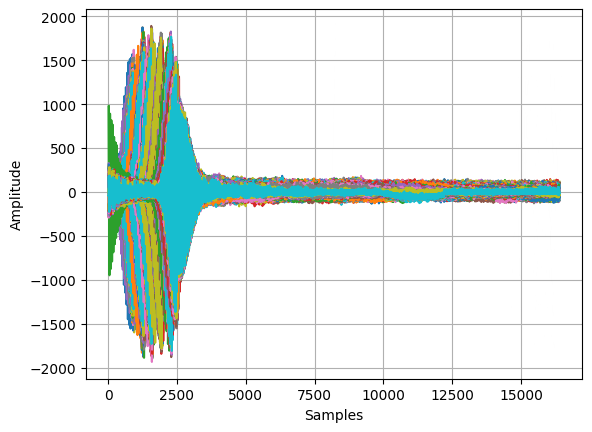

In [7]:
plottest = total.T
ax1 = plottest.plot(legend=None)
ax1.grid(True)
ax1.set_ylabel("Amplitude") 
ax1.set_xlabel("Samples")
#ax1.set_xlim(0,3500)
#ax1.set_ylim(-2200,2200)

In [59]:
plottest

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
16,0,-1,-30,-27,-1,-10,-2,2,-6,93,...,-18,-4,0,-20,-21,-12,-12,-11,5,-46
17,-16,-11,-32,-9,-8,-3,6,1,-2,26,...,-12,-1,-5,-17,-14,-2,-10,-8,8,-47
18,-4,-17,-23,-2,-9,85,2,-172,-5,0,...,-11,2,-14,-14,-8,-3,-16,-1,43,-37
19,84,-12,-9,-2,-152,55,-10,-197,-7,-137,...,-14,4,-11,-11,-139,-12,-125,-126,32,-30
20,50,-4,-26,-47,-159,24,36,-211,-175,-121,...,-169,-183,-36,86,-121,-9,-100,-144,-6,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16396,-32,19,-2,-7,4,-10,-12,-12,-14,-46,...,2,-7,-10,-13,-13,-11,-15,-2,-32,-15
16397,-11,12,-9,-9,11,-3,-15,-15,-7,-30,...,5,-10,-7,-9,-9,-5,-17,5,-37,-11
16398,26,13,-38,-1,3,6,-19,-19,-2,-13,...,0,-9,20,-11,-11,-6,-14,10,-38,-2
16399,28,10,-50,5,-8,1,-16,-16,-6,12,...,-1,-3,-2,-18,-18,-15,-12,5,-38,3


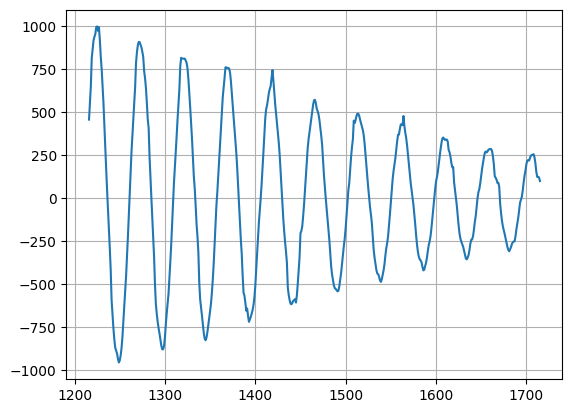

In [69]:
# Plotting the distance of 0.34 m , ie the first 200 rows of the DF

ax2 = plottest.iloc[1200:1700,0:1].plot(legend=None)
#plottest.iloc[:,0:200]
ax2.grid(True)

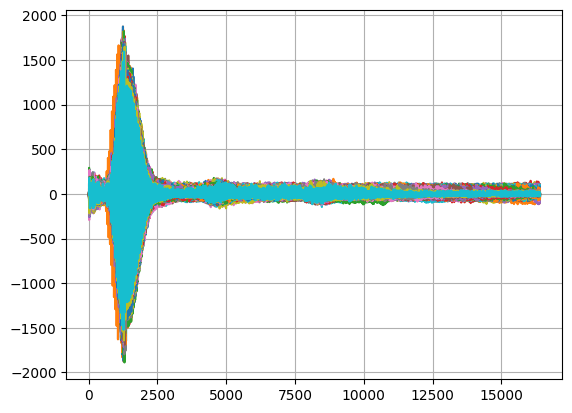

In [7]:
# Plotting the distance of 0.37 m , ie the next 200 rows of the DF

ax3 = plottest.iloc[:,200:400].plot(legend=None)
ax3.grid(True)

<AxesSubplot: >

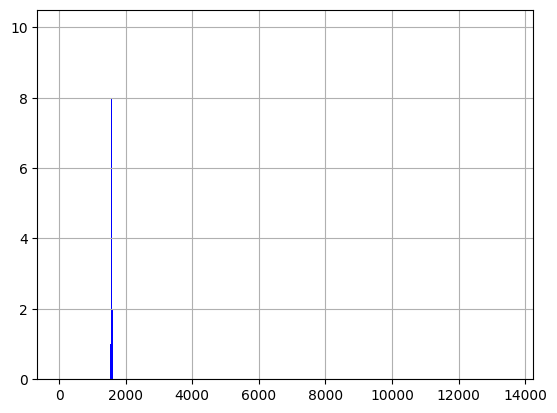

In [9]:
#Finding the maxima index for every reading
total["Max"] = total.idxmax(axis=1)
total.iloc[0:200,-1].hist(bins=16384, color="black")    #Distance of 0.34 m in black
total.iloc[200:400,-1].hist(bins=16384, color="red")    #Distance of 0.37 m in red
total.iloc[400:600,-1].hist(bins=16384, color="blue")   #Distance of 0.40 m in blue
total.iloc[600:800,-1].hist(bins=16384, color="orange") #Distance of 0.43 m in orange 
total.iloc[800:1000,-1].hist(bins=16384, color="green") #Distance of 0.46 m in green
total.iloc[1000:1200,-1].hist(bins=16384, color="pink") #Distance of 0.49 m in pink

#### The above figure roughly shows every 3 cm difference in target being moved has the samples moved by 300-350 samples ROUGHLY. As distance increases, differences end up in 200 samples or so

In [10]:
total.iloc[0:200,-1].mean()

915.665

In [17]:
total.iloc[200:400,-1].mean()

1281.985

In [16]:
total.iloc[400:600,-1].mean()

1639.855

In [13]:
total.iloc[600:800,-1].mean()

1933.92

In [14]:
total.iloc[800:1000,-1].mean()

2274.405

In [15]:
total.iloc[1000:1200,-1].mean()

2478.625

# Conversion ADC to FFT

In [42]:
onlyval = pd.DataFrame()
onlyval = onlyval.append(total.iloc[:,0:4000])
onlyval

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_17880\1605068756.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  onlyval = onlyval.append(total.iloc[:,0:4000])


,16,17,18,19,20,21,22,23,24,25,...,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015
0,0,-16,-4,84,50,9,-34,-73,-104,-125,...,82,71,58,61,64,51,38,36,29,8
1,-1,-11,-17,-12,-4,4,-239,-205,-171,-142,...,-14,-19,-37,-59,-66,-77,-92,-94,-87,-88
2,-30,-32,-23,-9,-26,-79,-112,-133,-160,-178,...,110,94,64,46,25,12,6,5,-8,-25
3,-27,-9,-2,-2,-47,-85,-109,-131,-154,-179,...,62,51,36,21,10,15,9,-10,-30,-36
4,-1,-8,-9,-152,-159,-177,-199,-217,-218,-216,...,4,-12,-22,-29,-34,-45,-49,-62,-82,-88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-12,-2,-3,-12,-9,-220,-194,-169,-149,-115,...,-18,41,-15,-46,-58,-56,-49,-42,-38,-36
1196,-12,-10,-16,-125,-100,-77,-49,-22,3,37,...,-49,-35,-35,-41,-32,-16,-19,-34,-23,-7
1197,-11,-8,-1,-126,-144,-168,-189,-199,-198,-203,...,-32,-42,-30,-12,-13,-32,-83,-81,-56,-35
1198,5,8,43,32,-6,-112,-159,-178,-187,-197,...,-17,-26,-39,-33,-3,-4,-34,-55,-56,-61


In [43]:
from numpy.fft import fft, ifft

onlyvalT = onlyval.T

X_fft1 = onlyvalT.apply(np.fft.fft)
N = 4000
X_fftmag1 = np.abs(X_fft1)/N


In [44]:
X_fftmag1

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
16,8.766250,6.732250,6.870500,6.489250,5.688000,5.814000,4.392500,4.180250,4.361250,8.211500,...,4.494500,15.932250,3.044250,2.410500,1.976000,3.481250,1.829500,3.556250,2.516750,5.946250
17,0.314987,0.341074,0.931240,0.824261,0.881151,0.840676,1.068517,0.338663,1.128767,0.531538,...,0.712051,11.448461,0.526600,0.494366,0.306240,0.268145,0.251798,0.493585,3.299883,0.730731
18,0.398835,0.279436,0.383482,0.283127,0.376016,0.506605,0.677680,0.431603,0.551379,0.433155,...,0.328489,5.488021,0.198109,0.472781,0.692959,0.317720,0.235909,0.375160,0.964601,0.401644
19,0.417667,0.480353,0.525321,0.278948,0.388230,0.416642,0.482102,0.438910,0.703536,0.019669,...,0.399520,2.177411,0.299995,0.530794,0.303005,0.071014,0.285418,0.277949,1.280125,0.272498
20,0.257566,0.306410,0.186734,0.476546,0.500172,0.439770,0.252901,0.162431,0.197149,0.195806,...,0.472413,2.426360,0.231866,0.482067,0.137571,0.249964,0.036291,0.589752,0.870376,0.370118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,0.846893,0.673585,0.741970,0.711100,1.011023,0.726414,0.655574,0.646732,0.593776,0.635960,...,0.435706,1.964062,0.427252,0.544976,0.660536,0.560240,0.474256,0.590254,0.366348,0.703004
4012,0.257566,0.306410,0.186734,0.476546,0.500172,0.439770,0.252901,0.162431,0.197149,0.195806,...,0.472413,2.426360,0.231866,0.482067,0.137571,0.249964,0.036291,0.589752,0.870376,0.370118
4013,0.417667,0.480353,0.525321,0.278948,0.388230,0.416642,0.482102,0.438910,0.703536,0.019669,...,0.399520,2.177411,0.299995,0.530794,0.303005,0.071014,0.285418,0.277949,1.280125,0.272498
4014,0.398835,0.279436,0.383482,0.283127,0.376016,0.506605,0.677680,0.431603,0.551379,0.433155,...,0.328489,5.488021,0.198109,0.472781,0.692959,0.317720,0.235909,0.375160,0.964601,0.401644


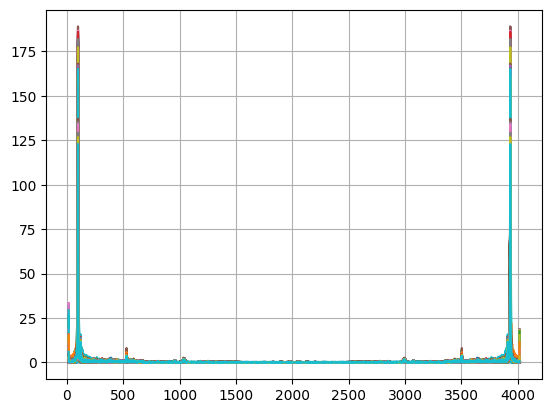

In [45]:
temp = X_fftmag1.iloc[:,:]
temp
ax4 = temp.plot(legend=None)
ax4.grid(True)
#ax2.set_xlim(300,500)
#ax2.set_ylim(0,70)

(0.0, 200.0)

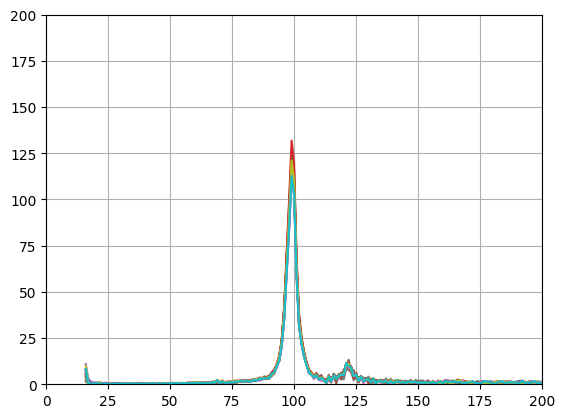

In [54]:
temp34 = X_fftmag1.iloc[:,800:820]
temp34
ax5 = temp34.plot(legend=None)
ax5.grid(True)
ax5.set_xlim(0,200)
ax5.set_ylim(0,200)

(0.0, 200.0)

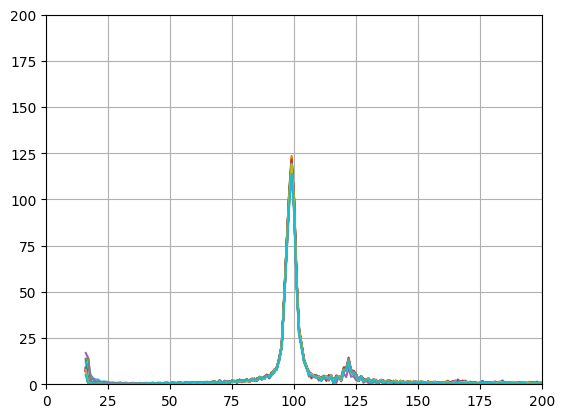

In [55]:
temp37 = X_fftmag1.iloc[:,1000:1020]
temp37
ax6 = temp37.plot(legend=None)
ax6.grid(True)
ax6.set_xlim(0,200)
ax6.set_ylim(0,200)

In [58]:
m = len(X_fftmag1)
m

4000

In [54]:
partpppar

# Feature Importance

#### Calculating importances of features in relation to the Target Class (0-empty, 1-baby)

In [9]:
X_train

,16,17,18,19,20,21,22,23,24,25,...,91,92,93,94,95,96,97,98,99,100
0,-0.195,-0.191,-0.186,0.756,0.744,0.723,0.678,0.605,0.511,0.398,...,0.132,0.112,0.084,0.047,-0.003,-0.053,-0.108,-0.173,-0.240,-0.306
1,-0.217,-0.209,-0.204,0.713,0.740,0.747,0.739,0.712,0.657,0.575,...,0.131,0.136,0.129,0.110,0.077,0.036,-0.016,-0.071,-0.135,-0.198
2,-0.210,-0.205,-0.200,-0.191,0.717,0.748,0.762,0.752,0.728,0.677,...,0.108,0.127,0.134,0.129,0.111,0.082,0.043,-0.007,-0.057,-0.110
3,-0.222,-0.229,-0.543,-0.392,-0.240,-0.086,0.064,0.211,0.351,0.473,...,-0.259,-0.203,-0.146,-0.089,-0.040,0.009,0.048,0.079,0.106,0.122
4,-0.156,-0.162,-0.166,-1.210,-1.167,-1.095,-0.998,-0.873,-0.730,-0.574,...,-0.415,-0.421,-0.419,-0.404,-0.380,-0.347,-0.312,-0.266,-0.218,-0.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.144,-0.152,-0.158,-0.170,-0.769,-0.717,-0.641,-0.553,-0.460,-0.367,...,-0.467,-0.402,-0.330,-0.252,-0.170,-0.089,-0.009,0.079,0.161,0.239
1396,-0.153,-0.148,-0.142,-0.133,0.702,0.726,0.733,0.723,0.690,0.633,...,0.099,0.125,0.130,0.125,0.107,0.083,0.047,0.002,-0.055,-0.111
1397,-0.147,-0.156,-0.827,-0.812,-0.778,-0.728,-0.658,-0.570,-0.479,-0.386,...,-0.471,-0.406,-0.327,-0.252,-0.173,-0.092,-0.011,0.074,0.159,0.237
1398,-0.185,-0.192,-0.199,-0.204,-0.478,-0.381,-0.290,-0.197,-0.110,-0.022,...,-0.174,-0.098,-0.015,0.070,0.156,0.238,0.308,0.360,0.397,0.417


In [24]:
y_train

6805     1
9591     1
10244    1
102      1
3988     1
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: Label, Length: 27189, dtype: int64

<AxesSubplot: >

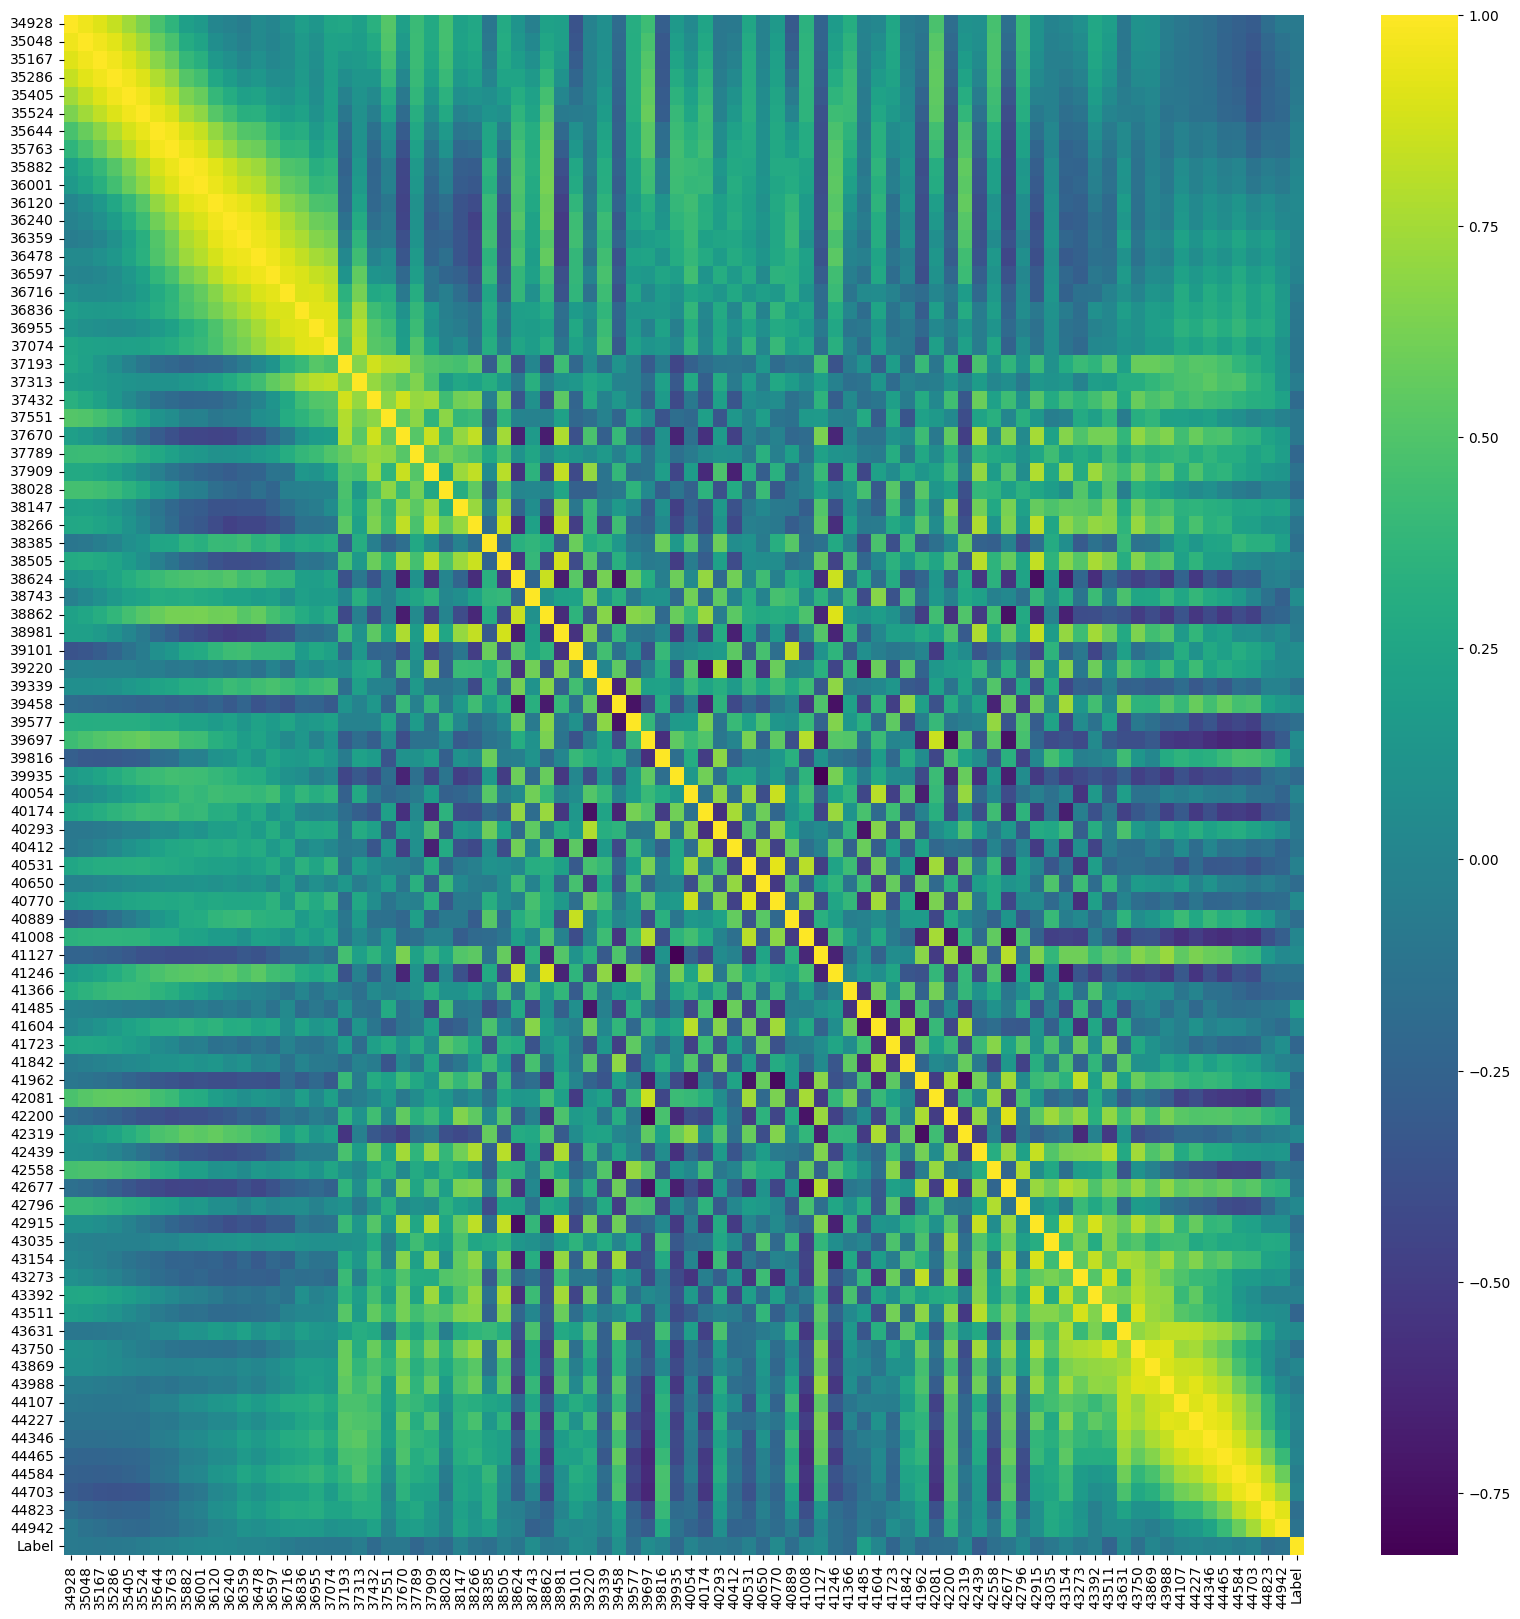

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(total.corr(),cmap='viridis',annot=False)

In [79]:
#Testing out feature importances with ExtraTrees Regressor Model

regmod = ExtraTreesRegressor()
regmod.fit(X_train,y_train)

print(regmod.feature_importances_)

[2.23256795e-05 6.15938040e-05 4.19204125e-05 3.85265033e-05
 4.89221915e-05 2.93885584e-05 1.90716311e-05 1.68012431e-05
 4.07056463e-05 3.66482385e-05 7.85218768e-05 2.56843285e-05
 3.15585275e-05 3.03634100e-05 3.55247771e-05 3.22844266e-04
 2.39397187e-05 1.56677062e-05 4.24904140e-05 4.15173460e-05
 1.20148974e-04 6.78800778e-05 1.03345246e-03 5.29834467e-04
 2.51524353e-05 9.62745181e-04 2.46155637e-03 6.02293422e-04
 1.43882025e-03 1.08783896e-03 1.20735118e-02 4.39337317e-03
 4.89837807e-03 4.92408164e-03 8.87684015e-03 8.95625362e-03
 2.02155896e-02 1.02871836e-02 2.13384815e-02 1.01864285e-02
 4.28545670e-02 5.22190244e-02 3.04969303e-02 2.42356321e-02
 3.28088251e-02 1.27056250e-02 4.23237751e-02 1.44972748e-02
 1.40267985e-02 1.12181776e-02 2.69135012e-02 3.40410781e-02
 2.42311649e-02 3.52623322e-02 4.26465455e-02 5.98285681e-02
 3.01870287e-02 3.18423583e-02 2.96488429e-02 1.91729405e-02
 2.81238387e-02 1.06035623e-01 1.02257945e-02 4.27405135e-02
 3.63431994e-02 9.204005

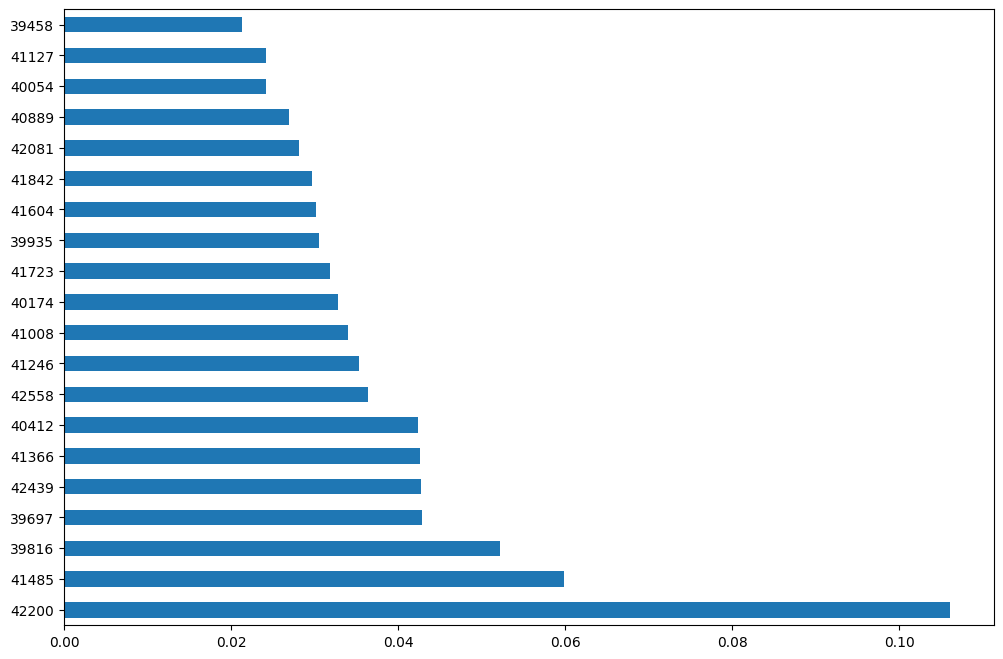

In [80]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()